In [217]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import os 

import warnings
warnings.simplefilter("ignore", FutureWarning)

In [162]:
datafile = os.path.join(os.path.dirname(os.getcwd()),'Data')
large = pd.read_csv(datafile+'/large.csv')
labels = pd.read_csv(datafile+'/jeopardy.csv')
data = pd.merge(large,labels, how='left',on = 'cif')
countries = pd.read_csv(datafile+'/country.csv')
countryRiskScore = pd.read_excel(datafile+'/public_basel_aml_index_rankings_2012-2018_0_0.xls',header = 2, skipfooter = 3)

In [176]:
dataCountries = pd.merge(data, countries, how='left',left_on = 'nationality', right_on = 'country_id')

In [163]:
countryRiskScoreNew = countryRiskScore
countryRiskScoreNew.Country = countryRiskScoreNew.Country.apply(lambda x: x.split('*')[0].split(',')[0])

In [178]:
dataCountries.describe()

,cif,category,turnover,transaction_count,io_ratio,age,nationality,is_pep,inactive_days_average,inactive_days_max,n_of_accounts,distinct_counterparties,channel_risk,atm_withdrawal,atm_deposit,suspicious,country_id
count,1.000000e+06,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000
mean,9.050000e+07,0.400530,2.937814e+07,28.136660,0.331490,31.726469,91.863301,0.006851,44.768997,114.264231,1.996756,6.246905,0.255042,3.212197e+06,1.078914e+05,0.017141,91.863301
std,2.886753e+05,0.663837,4.650136e+08,55.464787,0.308724,25.749573,43.678328,0.082487,52.223190,77.830115,0.999137,16.322718,0.174461,1.820511e+08,3.420959e+06,0.129797,43.678328
min,9.000000e+07,0.000000,0.000000e+00,0.000000,0.000000,0.000000,24.000000,0.000000,0.120000,1.000000,1.000000,0.000000,0.000026,0.000000e+00,0.000000e+00,0.000000,24.000000
25%,9.025000e+07,0.000000,9.053680e+04,1.000000,0.000000,0.000000,82.000000,0.000000,5.680000,72.000000,1.000000,1.000000,0.122934,1.592175e+02,2.249756e+01,0.000000,82.000000
50%,9.050000e+07,0.000000,4.316990e+05,3.000000,0.309917,32.000000,90.000000,0.000000,28.220000,95.000000,2.000000,1.000000,0.217838,4.934665e+03,4.699416e+02,0.000000,90.000000
75%,9.075000e+07,1.000000,1.529052e+06,30.000000,0.500000,54.000000,123.000000,0.000000,63.520000,131.000000,3.000000,4.000000,0.348258,4.920691e+04,3.577423e+03,0.000000,123.000000
max,9.100000e+07,2.000000,1.308870e+11,1472.000000,1.000000,126.000000,187.000000,1.000000,1281.110000,1295.000000,10.000000,700.000000,0.998780,1.186690e+11,2.155327e+09,1.000000,187.000000


In [186]:
dataCountriesRisk = pd.merge(dataCountries,countryRiskScoreNew, left_on = 'country_name', right_on = 'Country',how = 'left')


In [187]:
dataCountriesRisk.drop(columns = ['Country','Ranking 2017'], inplace = True)

In [188]:
dataCountriesRisk.head()

,cif,category,turnover,transaction_count,io_ratio,age,nationality,is_pep,inactive_days_average,inactive_days_max,n_of_accounts,distinct_counterparties,channel_risk,atm_withdrawal,atm_deposit,suspicious,country_id,country_name,Overall score 2017
0,90000000,0,217673.05,125,0.304000,40,123,0,1.66,88,1,3,0.254742,1937.15,2161.790028,0,123,Namibia,6.589226
1,90000001,0,57.42,20,0.250000,17,90,0,7.32,88,4,6,0.393174,4.96,0.893866,0,90,Japan,5.362397
2,90000002,0,1465076.90,1,0.000000,66,123,0,24.08,25,2,1,0.422991,0.00,229.333494,0,123,Namibia,6.589226
3,90000003,0,429840.54,46,0.239130,43,90,0,3.88,86,2,17,0.296019,43123.33,3121.939606,0,90,Japan,5.362397
4,90000004,2,93356190.65,63,0.365079,0,186,0,2.77,100,1,1,0.067511,1814340.25,603026.545700,0,186,Isle of Man,NaN


In [190]:
dataCountriesRisk['Overall score 2017'].fillna(0, inplace = True)

In [191]:
data = dataCountriesRisk
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 19 columns):
cif                        1000000 non-null int64
category                   1000000 non-null int64
turnover                   1000000 non-null float64
transaction_count          1000000 non-null int64
io_ratio                   1000000 non-null float64
age                        1000000 non-null int64
nationality                1000000 non-null int64
is_pep                     1000000 non-null int64
inactive_days_average      1000000 non-null float64
inactive_days_max          1000000 non-null int64
n_of_accounts              1000000 non-null int64
distinct_counterparties    1000000 non-null int64
channel_risk               1000000 non-null float64
atm_withdrawal             1000000 non-null float64
atm_deposit                1000000 non-null float64
suspicious                 1000000 non-null int64
country_id                 1000000 non-null int64
country_name              

In [192]:
data.columns

Index(['cif', 'category', 'turnover', 'transaction_count', 'io_ratio', 'age',
       'nationality', 'is_pep', 'inactive_days_average', 'inactive_days_max',
       'n_of_accounts', 'distinct_counterparties', 'channel_risk',
       'atm_withdrawal', 'atm_deposit', 'suspicious', 'country_id',
       'country_name', 'Overall score 2017'],
      dtype='object')

In [193]:
df0 = data[data['category']==0]
df1 = data[data['category']==1]
df2 = data[data['category']==2]
df0.drop(columns=['category'], inplace = True)
df1.drop(columns=['category','age','is_pep'], inplace = True)
df2.drop(columns=['category','age','is_pep'], inplace = True)

/Users/lamiakasmi/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### Random Forest on Individuals

In [196]:
features0 = ['turnover', 'transaction_count', 'io_ratio', 'age',
       'nationality', 'is_pep', 'inactive_days_average', 'inactive_days_max',
       'n_of_accounts', 'distinct_counterparties', 'channel_risk',
       'atm_withdrawal', 'atm_deposit', 'Overall score 2017']

In [197]:
X_train, X_test, y_train, y_test = train_test_split(df0[features0], df0['suspicious'], test_size=0.3, random_state=42)

In [198]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489829 entries, 48212 to 173806
Data columns (total 14 columns):
turnover                   489829 non-null float64
transaction_count          489829 non-null int64
io_ratio                   489829 non-null float64
age                        489829 non-null int64
nationality                489829 non-null int64
is_pep                     489829 non-null int64
inactive_days_average      489829 non-null float64
inactive_days_max          489829 non-null int64
n_of_accounts              489829 non-null int64
distinct_counterparties    489829 non-null int64
channel_risk               489829 non-null float64
atm_withdrawal             489829 non-null float64
atm_deposit                489829 non-null float64
Overall score 2017         489829 non-null float64
dtypes: float64(7), int64(7)
memory usage: 56.1 MB


In [ ]:
#Start time to measure how much time it gets our classifier to train a model
start_time = time.time()
#class_weight = {'Overall score 2017' : }
# class_weight='balanced' to deal with a problem with highly imbalanced dataset
rf =  RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state = 42)
rf.fit(X_train, y_train)
preds = rf.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))
#Using confusion matrix as our metrics
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print("tn, fp, fn, tp:", tn, fp, fn, tp)

In [ ]:
#Calculating the size od test set, suspisious number of customer and non-suspisiouc number of customers
s = len(X_test)
f = y_test.sum()
non_f = s - f
#Plotting confusion matrix as a heatmap and see how many (%) we get right/wrong among suspicious and non-suspicious customers
ax = sns.heatmap([[tn/non_f*100, fp/non_f*100],[fn/f*100, tp/f*100]],annot_kws={"size": 18},annot=True,fmt=".2f", cmap='YlGnBu')
for t in ax.texts: t.set_text(t.get_text() + " %")
plt.xlabel("Predicted")
plt.ylabel("Actual")
ax.set_xticklabels(["No", "Yes"])
ax.set_yticklabels(["No", "Yes"])
plt.show()
print("Number of total customers in test set:", s)
print("Number of customer without suspicious behaviour:", non_f)
print("Number of customer withsuspicious behaviour:", f)

In [204]:
importance = pd.DataFrame(rf.feature_importances_)
importance.index = features0
df = importance.rename(columns={0:"Importance"}).sort_values(by='Importance', ascending=False)
df

,Importance
io_ratio,0.128598
age,0.127596
turnover,0.123717
atm_withdrawal,0.119868
inactive_days_average,0.092581
channel_risk,0.087702
atm_deposit,0.072427
inactive_days_max,0.070416
transaction_count,0.056761
nationality,0.042416


In [205]:
df.Importance.nlargest(6)

io_ratio                 0.128598
age                      0.127596
turnover                 0.123717
atm_withdrawal           0.119868
inactive_days_average    0.092581
channel_risk             0.087702
Name: Importance, dtype: float64

### Analyzing suspicious profiles

In [206]:
y_test['preds'] = preds
dataToExplore = pd.merge(X_test,pd.DataFrame(y_test),how = 'left',left_index = True, right_index = True)

In [207]:
dataToExplore.head()

,turnover,transaction_count,io_ratio,age,nationality,is_pep,inactive_days_average,inactive_days_max,n_of_accounts,distinct_counterparties,channel_risk,atm_withdrawal,atm_deposit,Overall score 2017,suspicious
98402,852639.81,1,0.000000,78,82,0,84.91,170,2,1,0.193655,0.00,20288.065310,6.318698,0
96122,418640.94,3,0.333333,28,90,0,12.65,38,2,1,0.179298,13675.85,1036.502453,5.362397,0
369485,3080907.62,3,0.000000,47,32,0,25.03,51,2,1,0.159140,3080907.62,24854.716820,0.000000,1
917563,169310.44,3,0.000000,42,33,0,54.55,164,3,1,0.428293,169310.44,789.089365,0.000000,0
117546,1833.89,1,0.000000,37,125,0,53.72,108,3,1,0.530772,0.00,1.634894,4.934303,0


In [208]:
suspicious = dataToExplore[dataToExplore.suspicious == 1]

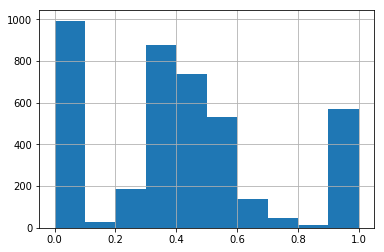

In [209]:
suspicious.io_ratio.hist()

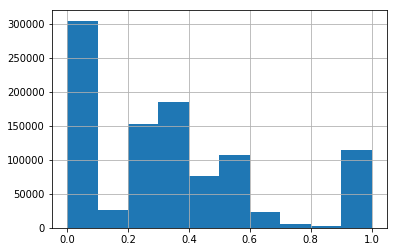

In [210]:
data.io_ratio.hist()

In [211]:
suspicious.turnover.describe()

count    4.118000e+03
mean     3.838313e+06
std      3.259674e+07
min      2.078000e+01
25%      2.855052e+05
50%      7.839931e+05
75%      2.017425e+06
max      1.316671e+09
Name: turnover, dtype: float64

In [212]:
data.turnover.describe()

count    1.000000e+06
mean     2.937814e+07
std      4.650136e+08
min      0.000000e+00
25%      9.053680e+04
50%      4.316990e+05
75%      1.529052e+06
max      1.308870e+11
Name: turnover, dtype: float64

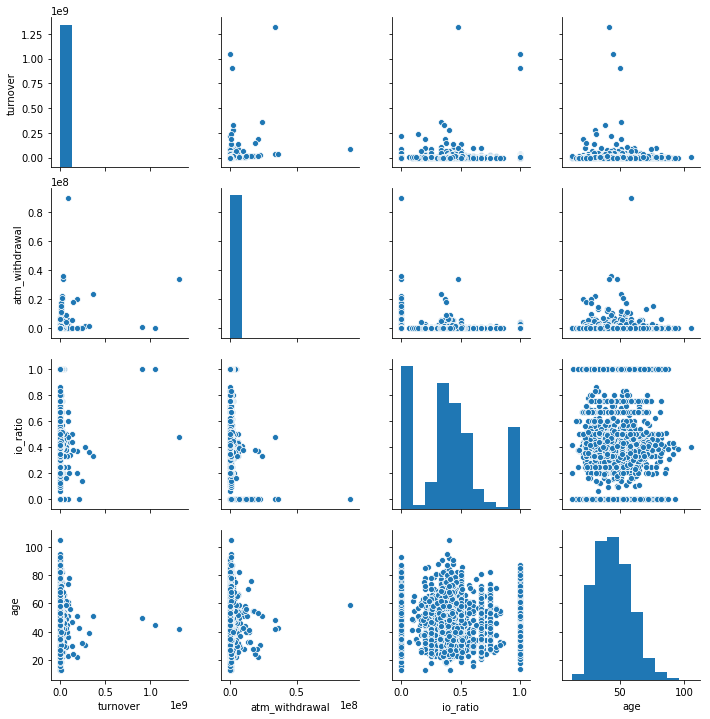

In [213]:
sns.pairplot(suspicious[['turnover','atm_withdrawal','io_ratio','age']])

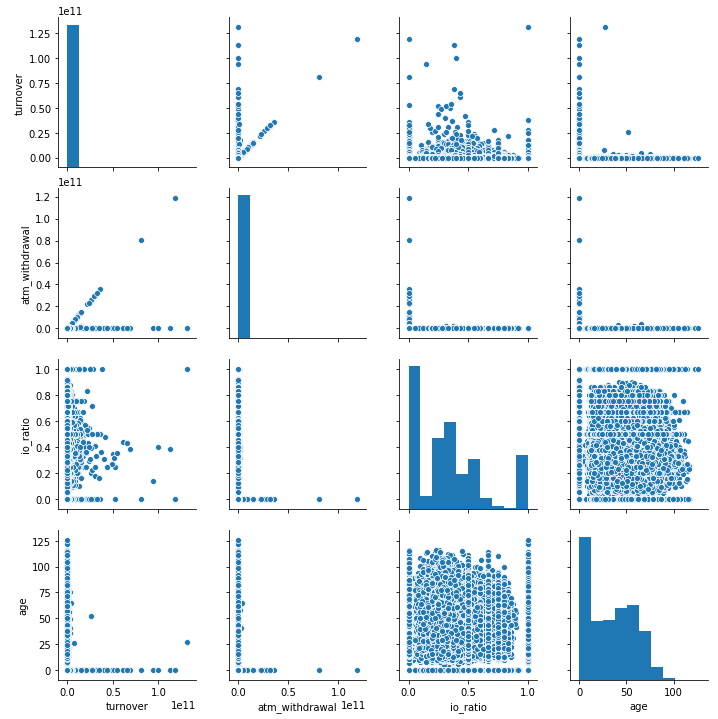

In [55]:
sns.pairplot(data[['turnover','atm_withdrawal','io_ratio','age']])